<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Cambio de perspectiva  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/cartas.jpg" align="middle" style="width:550px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo transformaciones geométricas, con el objetivo de cambiar la perspectiva de un conductor de automóvil a la vista aérea y de esta manera tener una mejor comprensión del camino.
   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [112]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

# Actividad 1


Tomar una foto a la carta que el profesor le proporcionará (asegurarse de que la foto tenga una perspectiva como la del ejemplo), descargarla y cambiarle el nombre a "carta.jpg".

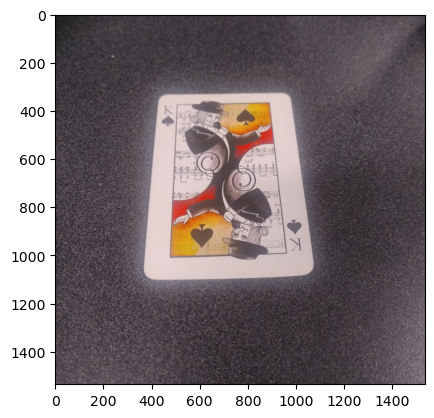

In [113]:
#Obtenga la imagen de la carta asignada por el profesor, 
#El nombre de la variable para guardar la imagen origina de la carta será "img"
img =  cv.imread('figuras/carta.jpeg')
img =  cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

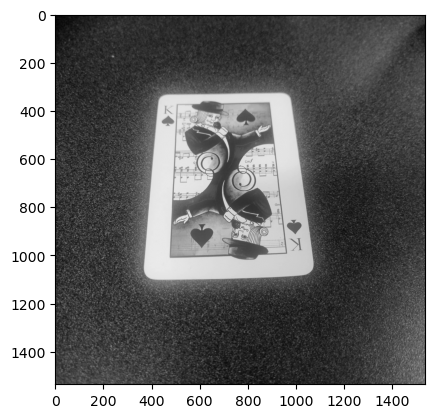

In [114]:
#Cambiar la imagen original a escala de grises, usar la variable img_gris
img_gris = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img_gris, cmap='gray')

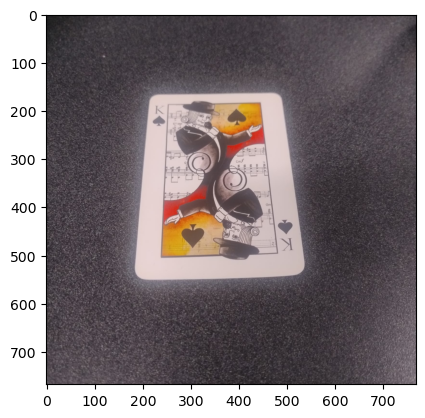

In [115]:
#Cambiar la imagen original a la mitad de tamaño, usar la variable img_mitad
img_mitad = cv.resize(img, (img.shape[0]//2, img.shape[1]//2))
plt.imshow(img_mitad)

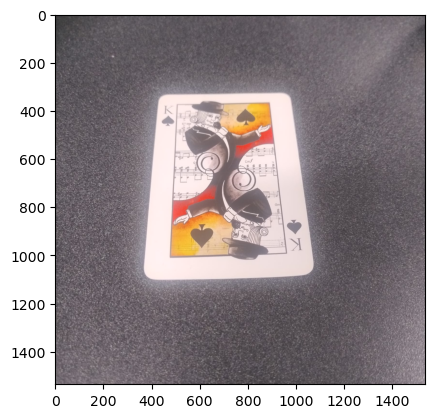

In [116]:
#Tomando la imagen original, aumentar la intensidad de la imagen (30 unidades), usar la variable img_a30
M = np.ones(img.shape, dtype = np.uint8)*30
img_a30 = cv.add(img, M)

plt.imshow(img_a30)

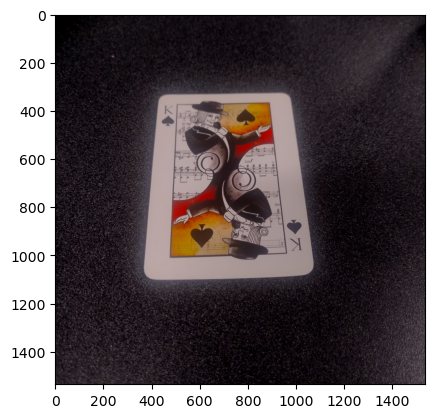

In [117]:
#Tomando la imagen original,disminuir la intensidad de la imagen (45 unidades), usar la variable img_m45
M2 = np.ones(img.shape, dtype=np.uint8) * 45

img_m45 = cv.subtract(img, M2)
plt.imshow(img_m45)

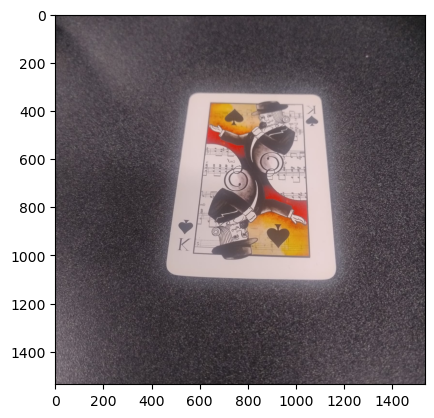

In [118]:
#Rotar la imagen original con efecto espejo, usar la variable img_espejo
img_espejo = cv.flip(img, 1)

plt.imshow(img_espejo)

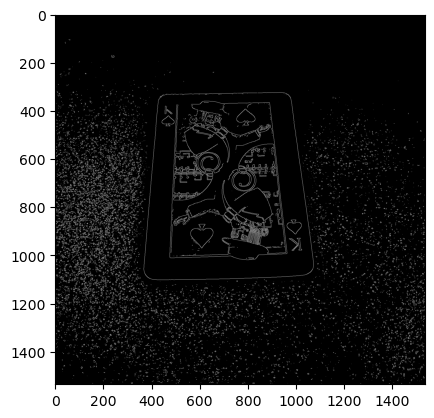

In [119]:
#Tomando la imagen img_gris aplicar el Filtro Gaussiano + la detección de Bordes con Canny
img_gauss = cv.GaussianBlur(img, (13,13), 1)

img_border =  cv.Canny(img_gauss, 100, 100)

plt.imshow(img_border, cmap='gray')

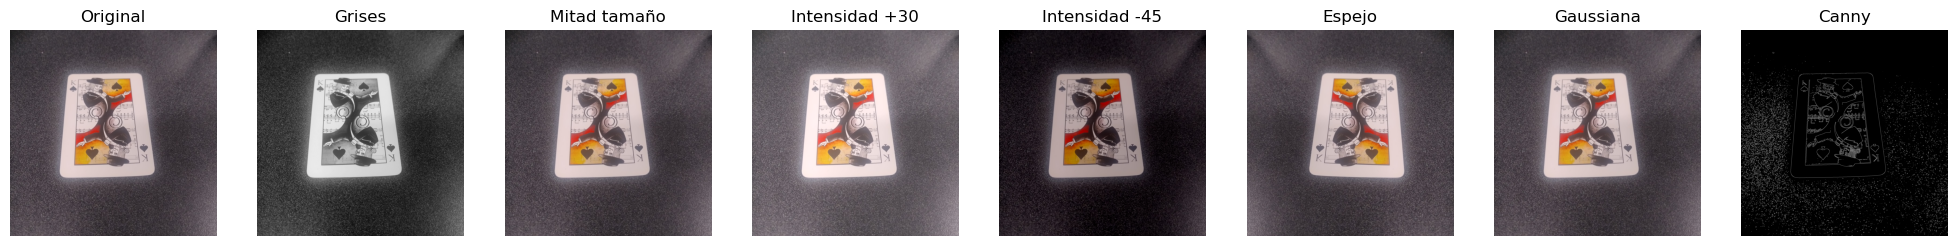

In [120]:
#Mostrar todas las transformaciones 
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1,8, figsize=(25,25))

ax1.imshow(img)
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(img_gris, cmap='gray')
ax2.set_title('Grises')
ax2.axis('off')

ax3.imshow(img_mitad)
ax3.set_title('Mitad tamaño')
ax3.axis('off')

ax4.imshow(img_a30)
ax4.set_title('Intensidad +30')
ax4.axis('off')

ax5.imshow(img_m45)
ax5.set_title('Intensidad -45')
ax5.axis('off')

ax6.imshow(img_espejo)
ax6.set_title('Espejo')
ax6.axis('off')

ax7.imshow(img_gauss)
ax7.set_title('Gaussiana')
ax7.axis('off')

ax8.imshow(img_border, cmap='gray')
ax8.set_title('Canny')
ax8.axis('off')

plt.show()

# Actividad 2

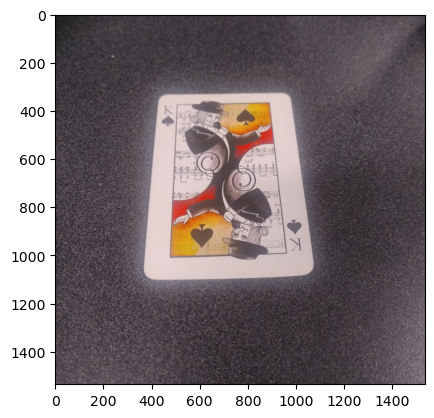

In [121]:
#Obtenga la imagen de la carta asignada por el profesor
#El nombre de la variable para guardar la imagen origina de la carta será "img"
plt.imshow(img)


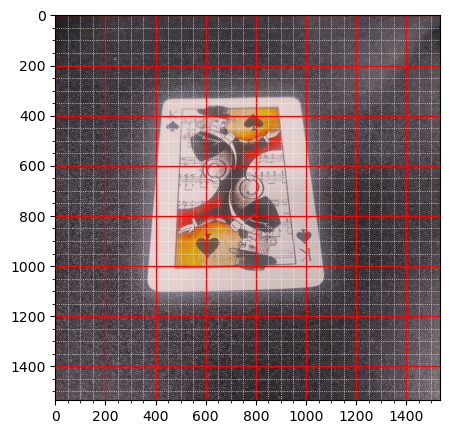

In [122]:
#Ampliar y mejorar la visibilidad del plano cartesiano
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')


In [123]:
#Puntos de las esquinas
p1 = (450, 370)
p2 = (970, 360)
p3 = (400, 1050)
p4 = (1020, 1050)

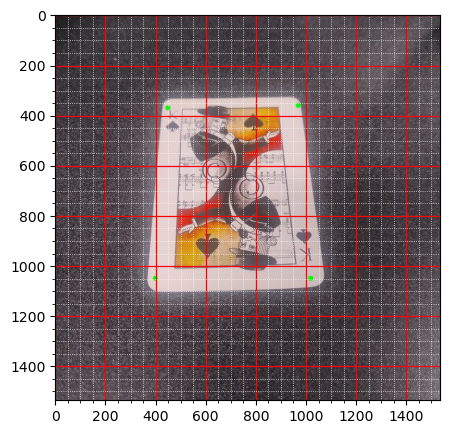

In [124]:
#Obteniendo la matriz de transformación y cambiando de perspectiva
fig,ax = plt.subplots(figsize=(5,5))
cv.circle(img, p1, 10, (0,255,0), - 1)
cv.circle(img, p2, 10, (0,255,0), - 1)
cv.circle(img, p3, 10, (0,255,0), - 1)
cv.circle(img, p4, 10, (0,255,0), - 1)
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')

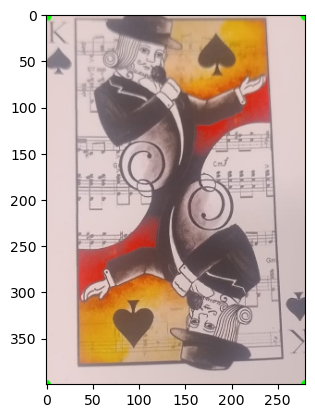

In [129]:
#Imagen con cambio de perspectiva 
altura = 400
ancho = 280

pts1=np.float32( [  p1, p2, p3, p4  ]  )
pts2=np.float32([[0,0],[ancho,0],[0,altura],[ancho, altura]])

m_transformer=cv.getPerspectiveTransform(pts1,pts2 )
img_nueva_perspectiva=cv.warpPerspective( img,
                                        m_transformer,
                                        (ancho,altura))

plt.imshow(img_nueva_perspectiva)

### Resultado final

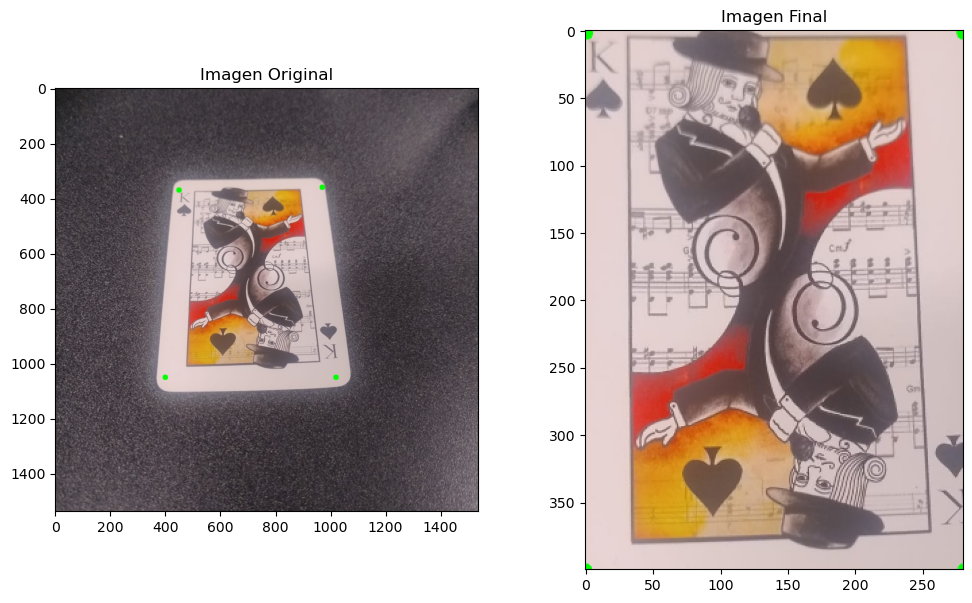

In [128]:
# Mostrar la imagen original y la que tiene el cambio  de perspectiva 
# Mostrar la imagen original y la que tiene el cambio  de perspectiva 
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Imagen Final')
plt.imshow(img_nueva_perspectiva)
plt.show()